In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

this image is:  <class 'numpy.ndarray'> with dimentions:  (720, 1280, 3)


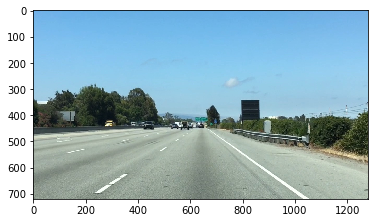

In [105]:
#read in the image and print out some stats
#image = mpimg.imread('C:/Users/JERAZO/Documents/Curso-MachineLearning/test.jpg') on windows
image = mpimg.imread('/home/jose/Pictures/test.jpg') #on ubuntu

print('this image is: ', type(image),
      'with dimentions: ', image.shape)

#Grab the x and y size and make a copy of the image 
ysize = image.shape[0];
xsize = image.shape[1];

color_select = np.copy(image)

plt.imshow(image)
plt.show()

In [106]:
# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a change to play  with them soon in a quiz

red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

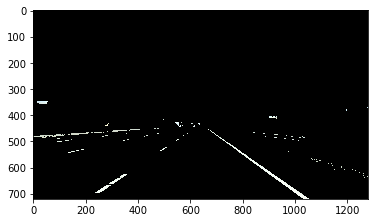

In [107]:
#After that, all pixels that meet my color criterion (those above the threshold) will be retained, and those 
#that do not (below the threshold) will be blacked out.

#Identify pixels below the threshold 
thresholds =(image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])

color_select[thresholds]=[0,0,0]
#Display the image

plt.imshow(color_select)
plt.show()

In [84]:
8 >= (4 | 3) >= 4

True

In [97]:
3 | 2

3

In [7]:
color_select

array([[[165, 191, 214],
        [129, 159, 185],
        [121, 157, 189],
        ...,
        [ 51,  87, 121],
        [  5,  35,  63],
        [ 19,  45,  70]],

       [[126, 156, 182],
        [130, 164, 192],
        [134, 172, 208],
        ...,
        [127, 167, 203],
        [ 76, 109, 140],
        [  5,  35,  63]],

       [[123, 159, 191],
        [133, 171, 207],
        [131, 176, 215],
        ...,
        [131, 176, 217],
        [127, 167, 203],
        [ 53,  89, 123]],

       ...,

       [[125, 137, 127],
        [137, 149, 139],
        [137, 149, 139],
        ...,
        [164, 177, 168],
        [159, 172, 163],
        [ 78,  91,  82]],

       [[128, 140, 130],
        [131, 143, 133],
        [132, 144, 134],
        ...,
        [174, 187, 178],
        [ 97, 110, 103],
        [ 17,  30,  23]],

       [[165, 177, 167],
        [127, 139, 129],
        [121, 133, 123],
        ...,
        [ 74,  87,  78],
        [ 20,  33,  26],
        [ 28,  41,  34]]

This image is:  <class 'numpy.ndarray'> with dimentsions: (720, 1280, 3)


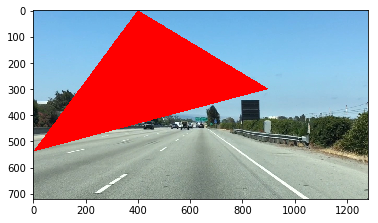

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#read the image and print some stats
#image = mpimg.imread('C:/Users/JERAZO/Documents/Curso-MachineLearning/test.jpg') on windows
image = mpimg.imread('/home/jose/Pictures/test.jpg') #on ubuntu
print('This image is: ', type(image),
      'with dimentsions:', image.shape)

# Pull out the x and y sizes and make a copy of the image 

ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 

left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

# Fit lines (y=Ax+B) to identify the 3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

#Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

#display the image
plt.imshow(region_select)

# uncomment if plot does not display
# plt.show()

In [9]:
#print(YY)
#print(XX*fit_right[0] + fit_right[1])
#fit_left

left_bottom = [0, 5]
right_bottom = [9, 3]
apex = [4, 0]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

XX, YY = np.meshgrid(np.arange(0, 10), np.arange(0, 10))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

print(region_thresholds)
print(fit_left)
print(fit_right)
print(fit_bottom)
print(YY)
print(XX)

[[False False False False  True False False False False False]
 [False False False False  True  True False False False False]
 [False False False  True  True  True  True  True False False]
 [False False  True  True  True  True  True  True  True False]
 [False  True  True  True  True False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]
[-1.25  5.  ]
[ 0.6 -2.4]
[-0.22222222  5.        ]
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7

In [10]:
x = np.array([1, 2, 3, 4, 5])

y = np.array([3, 5, 7, 9, 11])

In [11]:
coefs = np.polyfit(x, y,1)
coefs

array([2., 1.])

In [12]:
ex, ey = np.meshgrid(np.arange(0, 3), np.arange(0, 3))
print(ex)
print(ey)
s = ex > ey
s

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]]


array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

# Combining Color and Region Selections

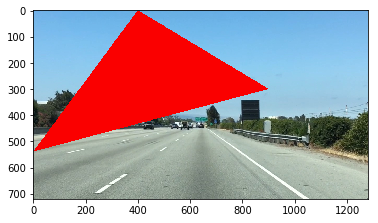

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#read in the image
#image = mpimg.imread('C:/Users/JERAZO/Documents/Curso-MachineLearning/test.jpg') on windows
image = mpimg.imread('/home/jose/Pictures/test.jpg') #on ubuntu

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.

ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

#define our color criteria

red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)

left_bottom = [0,539]
right_bottom = [900, 300]
apex = [400, 0]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold

color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                   (image[:,:,1] < rgb_threshold[1]) | \
                   (image[:,:,2] < rgb_threshold[2]) 
            
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color selection
color_select[color_thresholds] = [0,0,0]

# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [250, 0, 0]
# Display our two output images
#plt.imshow(color_select)
plt.imshow(line_image)

# uncomment if plot does not display
# plt.show()

In [14]:
True & True

True

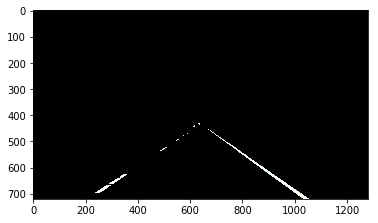

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#read in the image
#image = mpimg.imread('C:/Users/JERAZO/Documents/Curso-MachineLearning/test.jpg') on windows
image = mpimg.imread('/home/jose/Pictures/test.jpg') #on ubuntu

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.

ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

#define our color criteria

red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)

left_bottom = [0,720]
right_bottom = [xsize, 720]
apex = [640, 420]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold

color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                   (image[:,:,1] < rgb_threshold[1]) | \
                   (image[:,:,2] < rgb_threshold[2]) 
            
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color selection
color_select[color_thresholds | ~region_thresholds] = [0,0,0]

# Find where image is both colored right and in the region
#line_image[~color_thresholds & region_thresholds] = [250, 0, 0]
# Display our two output images
#plt.imshow(color_select)
#plt.imshow(line_image)

# uncomment if plot does not display
# plt.show()
plt.imshow(color_select)

#x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
#y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
#plt.plot(x, y, 'b--', lw=4)
#plt.imshow(color_select)
#plt.imshow(line_image)



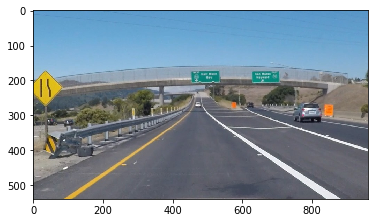

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('/home/jose/Pictures/exit-ramp.jpg')
plt.imshow(image)

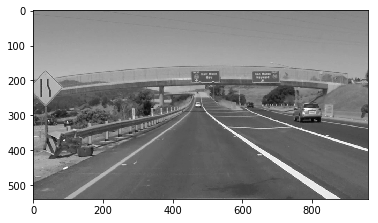

In [17]:
import cv2

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

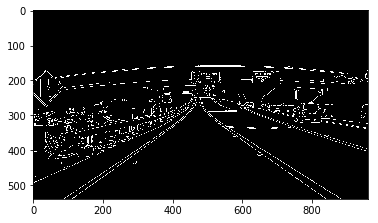

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
image = mpimg.imread('/home/jose/Pictures/exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 60
high_threshold = 200
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

In [18]:
import matplotlib.pyplot as plt
import 